In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as  plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/Prob_stats_proj

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1fTHaPDtmivyiIpSHGTZp1shaQtHTWfIf/Prob_stats_proj


#Data Preprocessing

In [ ]:
data = pd.read_csv('7.csv')

In [ ]:
## converting date column to datetime data type ##
data['Date'] = pd.to_datetime(data['Date'])

##Data snapshot
Following df view gives a snapshot of the columns in our data and the values in each of them

In [ ]:
data

,Date,IA confirmed cumulative,ID confirmed cumulative,IA deaths cumulative,ID deaths cumulative,IA confirmed,ID confirmed,IA deaths,ID deaths
0,2020-01-22,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
433,2021-03-30,349742,179429,5726,1956,141,0,7,0
434,2021-03-31,350840,180536,5744,1962,1098,1107,18,6
435,2021-01-04,351651,180897,5744,1963,811,361,0,1
436,2021-02-04,352262,181181,5752,1966,611,284,8,3


##Data features
Following list displays the list of features in our dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     438 non-null    datetime64[ns]
 1   IA confirmed cumulative  438 non-null    int64         
 2   ID confirmed cumulative  438 non-null    int64         
 3   IA deaths cumulative     438 non-null    int64         
 4   ID deaths cumulative     438 non-null    int64         
 5   IA confirmed             438 non-null    int64         
 6   ID confirmed             438 non-null    int64         
 7   IA deaths                438 non-null    int64         
 8   ID deaths                438 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 30.9 KB


#Detecting outliers with Tukey's rule
Using Tukey's rule, we detected outliers and found the number of outliers for each feature

Negative value found at 2020-12-25 for ID state. 

Outliers - 
-  IA confirmed - 38
- IA deaths - 35
- ID confirmed - 28
- ID deaths - 37

But when removing the outliers, most of the original data was getting deleted. So instead we used the original data to perform the asked inferences.

In [ ]:
def IQR(X):
    X = sorted(X)
    n = len(X)
    Q1 = X[np.int(np.ceil(n/4))]
    Q3 = X[np.int(np.ceil(3*n/4))]
    
    return Q3-Q1, Q1, Q3   

def outliers(X, handle, a, b):
    if( a < 0): a=0
        
    condition = (X[handle] < a) | (X[handle] > b)
    outlier = X.loc[condition]
    
    return outlier
    

#### Data plot
The following scatter plot represent the data for each of the features and identifies the outliers in yellow

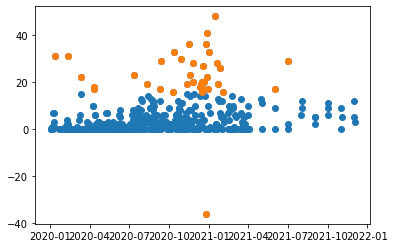

37


In [ ]:
handle = 'ID deaths'

iqr, q1,q3 = IQR(data[handle])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr


outlier_data = outliers(data, handle, threshold_min, threshold_max)

plt.scatter(data['Date'], data[handle])
plt.scatter(outlier_data['Date'], outlier_data[handle])
plt.show()
print(len(outlier_data))

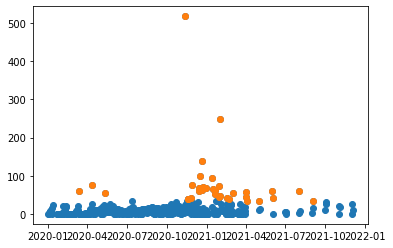

35


In [ ]:
handle = 'IA deaths'

iqr, q1,q3 = IQR(data[handle])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr


outlier_data = outliers(data, handle, threshold_min, threshold_max)

plt.scatter(data['Date'], data[handle])
plt.scatter(outlier_data['Date'], outlier_data[handle])
plt.show()
print(len(outlier_data))

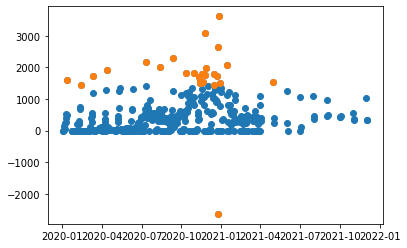

28


In [ ]:
handle = 'ID confirmed'

iqr, q1,q3 = IQR(data[handle])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr


outlier_data = outliers(data, handle, threshold_min, threshold_max)

plt.scatter(data['Date'], data[handle])
plt.scatter(outlier_data['Date'], outlier_data[handle])
plt.show()
print(len(outlier_data))

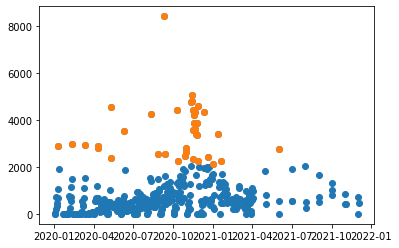

38


In [ ]:
handle = 'IA confirmed'

iqr, q1,q3 = IQR(data[handle])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr


outlier_data = outliers(data, handle, threshold_min, threshold_max)

plt.scatter(data['Date'], data[handle])
plt.scatter(outlier_data['Date'], outlier_data[handle])
plt.show()
print(len(outlier_data))

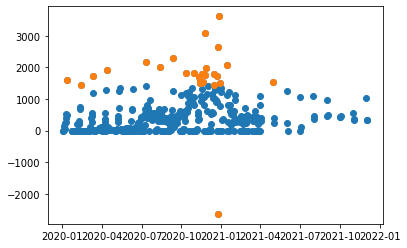

28


In [ ]:
handle = 'ID confirmed'

iqr, q1,q3 = IQR(data[handle])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr


outlier_data = outliers(data, handle, threshold_min, threshold_max)

plt.scatter(data['Date'], data[handle])
plt.scatter(outlier_data['Date'], outlier_data[handle])
plt.show()
print(len(outlier_data))